<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# __Autoencoder with Python__

Estimated time needed: **60** minutes


In this lab, we will first review how to build a shallow autoencoder using the Keras functional API and the Model subclassing. Then, we will review some applications of autoencoders such as image denoising and image compression. Lastly, we will use what we have learned in the later sections to build deeper autoencoders.

As the figure shows below, when used on images, autoencoders can not only return the reconstructed image but also return a compressed version of it. The compressed data is very useful as it achieves the goal of dimensionality reduction while retaining meaningful information from the image. We will soon dive deep into how different types of autoencoders help us realize all these goals!

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/intro_pic.png" width="65%" style="vertical-align:middle;margin:30px 0px"></center>

Image credits to [Yifei Zhang](https://www.semanticscholar.org/paper/A-Better-Autoencoder-for-Image%3A-Convolutional-Zhang/b1786e74e233ac21f503f59d03f6af19a3699024?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01)


## Table of Contents

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li><a href="#Introduction">Introduction</a></li>
    <li>
        <a href="#Shallow Autoencoders">Shallow Autoencoders</a>
        <ol>
            <li><a href="#Autoencoders using the Functional API ">Autoencoders using the Functional API </a></li>
            <li><a href="#Autoencoders using Model Subclassing">Autoencoders using Model Subclassing </a></li>
        </ol>
    </li>
    <li><a href="Applications of Autoencoders">Applications of Autoencoders</a>
        <ol>
            <li><a href="#Anomaly Detection with Auto-Encoders">Anomaly Detection with Auto-Encoders</a></li>
            <li><a href="#Denoising Autoencoders">Denoising Autoencoders</a></li>
             <li><a href="#Exercise 1">Exercise 1</a></li>
             <li><a href="#Exercise 2">Exercise 2</a></li>
        </ol>           
    </li>
    <li><a href="Deep Autoencoders">Deep Autoencoders</a>
        <ol>
            <li><a href="#Loading Images From a Directory for Autoencoders">Loading Images From a Directory for Autoencoders</a></li>
        </ol>     
    </li>      
    <li><a href="#Convolutional Autoencoders">Convolutional Autoencoders</a></li>
</ol>


## Objectives

After completing this lab, you will be able to:

 - Apply Autoencoders to real world problems
 - Implement different autoencoder architecture
 - Train different autoencoders


----


## Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (like Watson Studio or Anaconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the following code cell.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy numpy==1.22.3 matplotlib==3.5.1 tensorflow==2.9.0 opencv-python==4.5.5.62

# Note: If your environment doesn't support "!mamba install", use "!pip install --user"

# RESTART YOUR KERNEL AFTERWARD AS WELL

Upgrade the tensorflow and skillsnetwork library:


In [1]:
%%capture
!pip install --upgrade tensorflow skillsnetwork

### Importing Required Libraries

*We recommend you import all required libraries in one place (here):*


In [2]:
import os
import copy
import skillsnetwork
import numpy as np
import matplotlib.pyplot as plt
# from numpy.core.fromnumeric import reshape # should not use

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2DTranspose, Conv2D
from tensorflow.keras.models import Model

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

### Defining Helper Functions


In [3]:
def plot_images(top, bottom, start=0, stop=5, reshape_x=(28,28), reshape_xhat=(28,28)):

    '''
    This function plots images from the start index to the stop index from two datasets

    '''

    n_samples=stop-start

    for i, img_index in enumerate(range(start, stop)):

        # Display original image
        ax = plt.subplot(2, n_samples, i+1)
        plt.imshow(top[img_index].reshape(reshape_x), cmap='grey')

        if i == n_samples // 2:
            plt.title("original images")

        ax.get_xaxis().set_visible(False) # hide x-axis from the plot
        ax.get_yaxis().set_visible(False) # hide y-axis from the plot


        # Display reconstructed image
        ax = plt.subplot(2, n_samples, i+1+n_samples)
        plt.imshow(bottom[img_index].reshape(reshape_xhat), cmap="gray")

        if i == n_samples // 2:
            plt.title("encoded images")

        ax.get_xaxis().set_visible(False) # hide x-axis from the plot
        ax.get_yaxis().set_visible(False) # hide x-axis from the plot

In [4]:
def graph_history(history, title='Log Loss and Accuracy over iterations'):

    fig = plt.figure(figsize=(16,8))
    fig.suptitle(title)
    n_plots = len(history.history.keys())
    colors = ['b','r','g','c','m','y','k','w','bx','rx']
    for i, (key, items) in enumerate(history.history.items()):
        ax = fig.add_subplot(1, n_plots, i+1)
        ax.plot(items, c = colors[i])
        ax.grid(True)
        ax.set(xlabel='iterations', title=key)

In [5]:
def add_noise(x_train, x_test, noise_factor = 0.3):
    '''
    this function adds random values from a normal distribution as noises to the data
    returns the noisy datasets.
    '''

    # Add random Gaussian noise to the data
    x_train_noised = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
    x_test_noised = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

    x_train_noised = tf.clip_by_value(x_train_noised, clip_value_min=0, clip_value_max=1.0).numpy()
    x_test_noised  = tf.clip_by_value(x_test_noised, clip_value_min=0, clip_value_max=1).numpy()
    # Note: value < 0 → 0 | value > 1 → 1 | 0 < value < 10 → value

    return x_train_noised, x_test_noised

In [6]:
def plot_code(h, y, numbers=[0,1,2,3,4,5,6,7,8,9], scale=[1,1,1]):
    """
    number: list of classes to be plotted
    scale: scale activations to plot better
    """

    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink','darkorange','lime']
    # Create empty logic array
    logic_array = np.zeros(len(y), dtype='bool')

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(projection='3d')

    for num, color in zip(numbers, color_list):

        logic_array = (y == num)
        plt.scatter(h[logic_array, 0], # X-axis
                    h[logic_array, 1], # Y-axis
                    h[logic_array, 2], # Z-axis
                    color = color,
                    label = num)

    plt.title("3D output of encoder, colored by digits")
    plt.legend(loc=[1.1,0.3])
    plt.show()

In [7]:
def avg(shape, dtype=None):

    # Created 3x3 kernel filter (mean filter)
    grad = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]]).reshape((3, 3, 1, 1)) / 9

    # Ensure the created kernel matches the expected weight shape
    assert grad.shape == shape

    # Return as tensorflow variable
    return tf.keras.backend.variable(grad, dtype='float32')

a_conv = Conv2D(filters = 1,                # 1 output filter
                kernel_size = 3,            # 3x3 kernel
                kernel_initializer = avg,
                strides = 1,                # move 1 pixel at a time
                padding = 'same')           # output size = input size

In [8]:
def display_auto(x_iter, n=1, B=1):

    for b in range(B):
        x = next(x_iter)

        # Create a figure with 2 subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

        # Display the "input" image on the first subplot
        ax1.imshow(x[1].numpy()[n, :, :, 0], cmap='grey')
        ax1.set_title("input")
        ax1.axis('off')

        # Display the "output" image on the second subplot
        ax2.imshow(x[0].numpy()[n, :, :, 0], cmap='gray')
        ax2.set_title('output')
        ax2.axis('off')

        plt.show()

## Introduction


An autoencoder is a neural network that minimizes the difference between the input and the output. The network has two parts: the **encoder** part which outputs the code $\textbf{Z}$ using the message $\textbf{X}$ such that $\textbf{Z} = \textbf{E(X)}$. The code $\textbf{Z}$ is then passed along to reconstruct the message $\textbf{X}$, and the **decoder** is the second part does the reconstruction, which produces $\hat{\textbf{X}}= \textbf{D(Z)}$.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/flow.png" width="60%" style="vertical-align:middle;margin:50px 0px"></center>

In general $\textbf{D(E(X))} = \hat{\textbf{X}}$ such that $\hat{\textbf{X}}$ is an approximation of $\textbf{X}$. This forces the model to learn useful properties of the data, which would be useful in applications such as image enhancement and outlier detection.


## Shallow Autoencoders

They are the simplest autoencoders, which typically consist of a one-layer encoder followed by a one-layer decoder. The encoder can have an activation function or not. Similarly, the decoder can have a real output or a bounded output, for example, between 0 and 1.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/shallow_model.png" width="45%" style="vertical-align:middle;margin:30px 0px"></center>


Let's use the MNIST data from `keras.datasets` as a beginning example:


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test  / 255.0

x_train = x_train.reshape((x_train.shape[0], np.prod(x_train.shape[1:])))
x_test  = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train.shape, x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784) (10000, 784)


Here we introduce two ways to build shallow autoencoders in Keras, one is using the **Keras functional API**, and the other one is **subclassing the Keras Model class**.


### Autoencoders using the Functional API

The functional interface **uses the layers as functions**, taking a tensor as input and outputting a tensor instead of stacking layers on top of one another (like the Sequential class in Keras). By doing so, your way of building up the model layers is **more flexible** in the sense that your **model can take inputs from multiple paths and then add the tensors together at some point**.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/functional_API.png" width="30%" style="vertical-align:middle;margin:0px 0px"></center>


We create an input object, ```input_img```, which allows us to input tensors into our model object; as each image is 784 dimensional, the input shape is (784, ).


In [ ]:
input_img = Input(shape = (784,))

We create an encoder layer using a Dense layer and the Relu activation. The encoding dimension will be the output dimension of the Dense layer. We also call the object ``input_img`` to specify the input of the encoding layer.


In [ ]:
encoding_dim = 36
encoder = Dense(encoding_dim, activation='relu')(input_img)

The output dimension of the image. We create a decoding layer using a Dense layer; as the image values are between 0 to 1, we use the sigmoid activation for the output. We also call the object ```encoder``` to specify the input of the decoding layer, and this layer can also be linear.


In [ ]:
decoder = Dense(784, activation='sigmoid')(encoder)

We combine the encoder and decoder using the model class for training and inference, specifying the input ```input_img``` and output  ```decoder```


In [ ]:
autoencoder = Model(input_img, decoder)

We compile the model using the adam optimizer and the cross entropy loss, and you can also use the mean square error as the loss function.


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

We now fit the model; if you recall, in the supervised case, the first two inputs are (y_true, y_pred), where y_true are the ground truth values, and y_pred is the predicted value. As the autoencoder tries to replicate the input, y_true and y_pred are the input x, similarly for the validation data. The rest of the parameters behave similarly.


In [ ]:
# Since input and output are the same, x_train & x_train are used.
history = autoencoder.fit(x_train, x_train,
                          epochs = 25,
                          batch_size = 256,
                          shuffle = True,
                          validation_data = (x_test, x_test))

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3833 - val_loss: 0.1843
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1745 - val_loss: 0.1488
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1449 - val_loss: 0.1300
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1282 - val_loss: 0.1184
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1176 - val_loss: 0.1100
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1096 - val_loss: 0.1040
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1038 - val_loss: 0.0992
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0995 - val_loss: 0.0957
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0962 - val_loss: 0.0933
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0939 - val_loss: 0.0917
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0925 - val_loss: 0.0904
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 

We can plot the loss for each iteration:


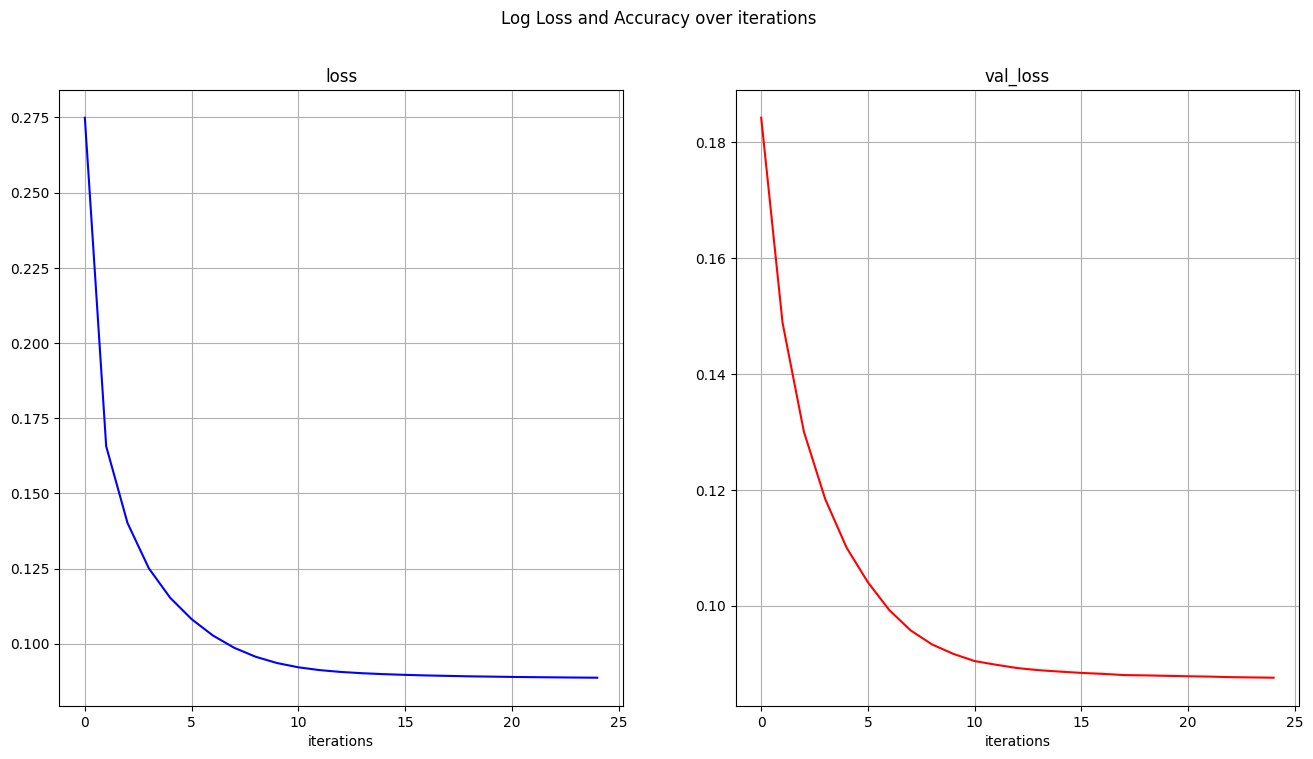

In [ ]:
graph_history(history, title='Log Loss and Accuracy over iterations')

We see that the loss is lower; furthermore, the training data is similar to the testing data. This suggests the Autoencoder does well at modeling the data.


We can make a prediction using the method ```predict```


In [ ]:
xhat = autoencoder.predict(x_test)
x_test.shape, xhat.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


((10000, 784), (10000, 784))

We can compare the output of the autoencoder with the original input. We see they are pretty similar:


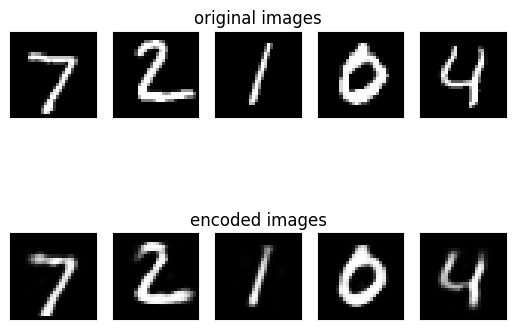

In [ ]:
plot_images(x_test, xhat, start=0, stop=5)

### Autoencoders using Model Subclassing

Keras also provides an object-oriented approach to creating models, where we can subclass the `keras.Model` class to have our own class of Autoencoder models inherit or override the properties and methods of `keras.Model`. This subclassing approach **helps with reusability and allows you to represent the models you want to create as classes**.

It's easier to use model subclassing to build autoencoders with the following boilerplate. Let's create an ```Autoencoder``` class using the `Model` class from `keras.models` as the parent class.


In [ ]:
from tensorflow import keras

In [ ]:
# Create Autoencoder class by inherting Keras model, which means custom model
class Autoencoder(keras.Model):
    def __init__(self, latent_dim): # counstructor method

        # Important to call the constructor of the parent class
        super(Autoencoder, self).__init__()
        # Store latent dimension size (compressed representation)
        self.latent_dim = latent_dim
        # Create encoder layer
        self.encoder = Dense(latent_dim, activation = 'relu')
        # Create decoder layer
        self.decoder = Dense(784, activation='sigmoid')

    # The forward pass of the model (defines computation)
    def call(self, x):

        # Pass x through encoder → produce smaller latent vector
        encoded = self.encoder(x)
        # Pass latent vector through decoder → reconstruct original input
        decoded = self.decoder(encoded)
        return decoded

```latent_dim``` is the size of the input, and the encoder is  given by

```encoder = tf.keras.Sequential([layers.Dense(latent_dim, activation='relu')])```

The decoder is given by:

```decoder = tf.keras.Sequential([layers.Dense(784, activation='sigmoid')])```

The method ```call``` will make a prediction and will be called when the method ```predict``` is called.


With subclassing, we can now create an ```autoencoder``` instance and the only parameter that needs to be specified is the ```encoding_dim```.


In [ ]:
encoding_dim = 36
autoencoder = Autoencoder(encoding_dim)

The `autoencoder` instance created will not only have the attributes and methods defined within the `autoencoder` class but also inherits all the attributes of the `Model` class.


All the steps are the same as above to fit the model and make a prediction:


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3805 - val_loss: 0.1814
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1730 - val_loss: 0.1485
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1444 - val_loss: 0.1285
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1263 - val_loss: 0.1156
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1147 - val_loss: 0.1072
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1069 - val_loss: 0.1013
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1015 - val_loss: 0.0973
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0976 - val_loss: 0.0943
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0949 - val_loss: 0.0922
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0930 - val_loss: 0.0908
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0918 - val_loss: 0.0899
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 

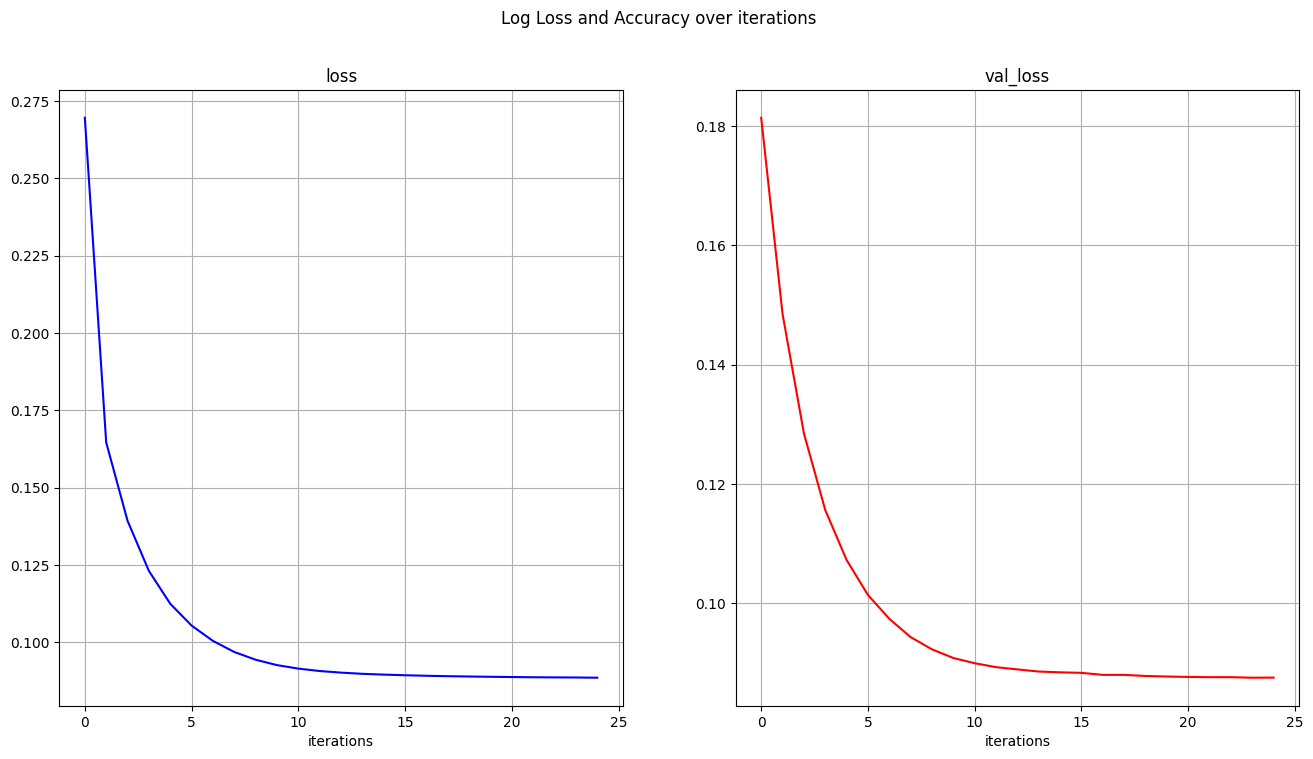

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                          epochs = 25,
                          batch_size = 256,
                          shuffle = True,
                          validation_data = (x_test, x_test))
graph_history(history, title='Log Loss and Accuracy over iterations')

Let's compare the images reconstructed by the trained autoencoder and the original image:


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


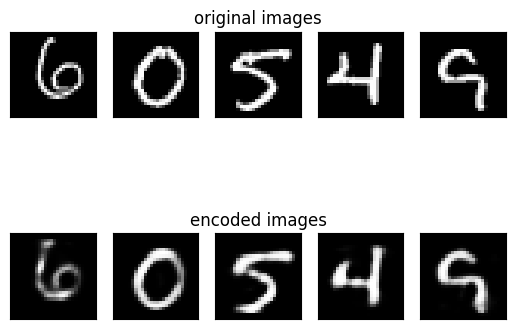

In [ ]:
xhat = autoencoder.predict(x_test)
plot_images(x_test, xhat, start=100, stop=105)

We can also generate the output of the encoder by calling the method ```encoder```, which returns the activation of the encoder layer:


In [ ]:
h = autoencoder.encoder(x_test) # only run encoder layer
h.shape

TensorShape([10000, 36])

Since the output dimension of the `encoder` layer is 36, we will need to reshape it to $6\times 6$ in order to plot it as images:


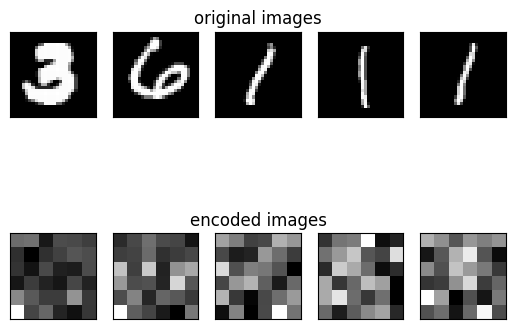

In [ ]:
plot_images(x_test, h.numpy(),
            start = 200,
            stop = 205,
            reshape_x = (28,28),
            reshape_xhat = (6,6))

Should you use the Keras functional API to create a new model, or just subclass the Model class directly? In general, the functional API is higher-level, easier, and safer, and has a number of features that subclassed models do not support.

However, Model subclassing provides greater flexibility when building models that are not easily expressible as directed acyclic graphs of layers. For example, you could not implement a Tree-RNN with the functional API and would have to subclass the Model directly.

As a last note, choosing between the functional API or Model subclassing isn't a binary decision that restricts you into one category of models. **All models in the `tf.keras` API can interact with each other, whether they're Sequential models, functional models, or subclassed models that are written from scratch!**


Now you know how an autoencoder is constructed and how it works, let's see some real-world applications of autoencoders!


## Applications of Autoencoders


### Anomaly Detection with Autoencoders
Due to the autoencoder architecture (encoder + decoder), autoencoders are forced to learn representations of the images. As a result, only data samples with a similar distribution can be reconstructed with fidelity. This means a high reconstruction loss can be interpreted and used as a method to detect anomalous samples within the data.

Consider the last example. We can find anomalies of the data as follows:

First, we calculate the loss between the predicted samples and the original data. Samples reconstructed with the highest error values (losses) are the anomalies.


We caculate the loss for each of the samples:


In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
bce = BinaryCrossentropy(from_logits=True)
loss = [bce(xt, xh) for xt, xh in zip(x_test, xhat)] # 10000 samples

Let's sort the losses with **np.argsort** and then use **np.flip** to flip the order of the indexes so that the losses are sorted in descending order:


In [ ]:
# Test np.argsort() and np.flip()
a = [1,4,6,2,4,7,2,3,6]
print(np.argsort(a))
print(np.flip(np.argsort(a)))
print(np.argsort(a)[::-1])

[0 3 6 7 4 1 2 8 5]
[5 8 2 1 4 7 6 3 0]
[5 8 2 1 4 7 6 3 0]


In [ ]:
idx = np.flip(np.argsort(loss))
# np.argsort() -> sort values (smaller to larger)and return indices
# np.flip() -> revered order

We plot the samples with the top ten losses:


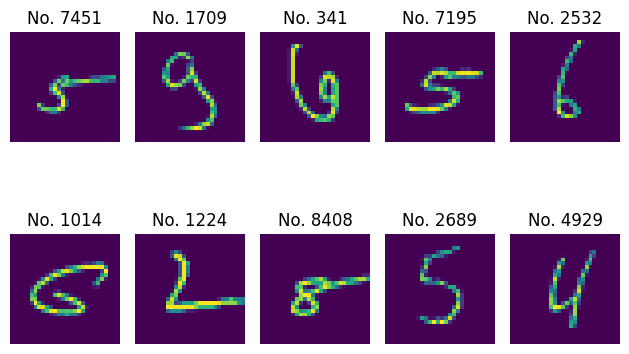

In [ ]:
# plt.figure(figsize=(18,3))

for i, index in enumerate(idx[0:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.title(f"No. {index}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Denoising Autoencoders

We can also use Autoencoders for denoising. The following figure illustrates what we would like a denoising autoencoder to achieve:

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/denoising.png" width="40%" style="vertical-align:middle;margin:15px 0px"></center>


Let's first add some artificial noises to our digit dataset using the helper function **add_noise**.


In [ ]:
x_train_noisy, x_test_noisy = add_noise(x_train, x_test, noise_factor = 0.4)

We can display the training images before and after adding the noises:


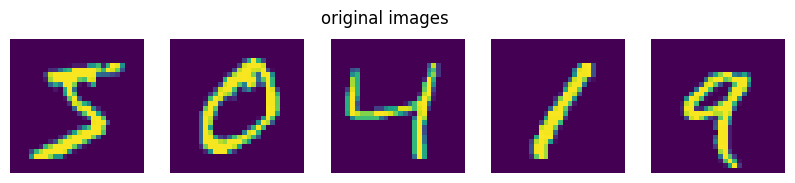

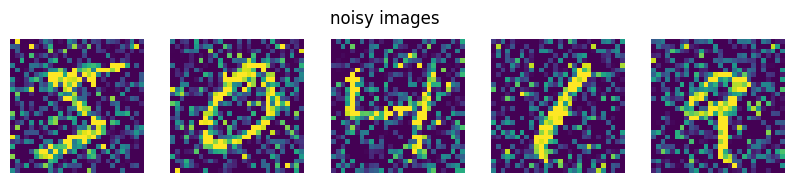

In [ ]:
fig1 = plt.figure(figsize=(10,2))
fig1.suptitle("original images")
fig2 = plt.figure(figsize=(10,2))
fig2.suptitle("noisy images")

for i, img_idx in enumerate(range(5)):
    ax1 = fig1.add_subplot(1, 5, i+1)
    ax1.imshow(x_train[img_idx].reshape((28,28)))
    ax1.axis('off')

    ax2 = fig2.add_subplot(1, 5, i+1)
    ax2.imshow(x_train_noisy[img_idx].reshape((28,28)))
    ax2.axis('off')

One way to build a **denoising Autoencoder** is to make the encoding dimension larger than the input dimension; Here, we create an ```autoencoder``` object with an encoding dimension **two times** the input dimension:


In [ ]:
encoding_dim = 2 * x_test.shape[1]
autoencoder = Autoencoder(latent_dim = encoding_dim)

We fit the model, for the fit method (y_true, y_pred), is the noisy data $x_{noisy}$ is the ground truth values, and y_pred is x_train the regular data $x$. The assumption is that where $x_{noisy}$ is a copy of $x$ with some form of noise. Training forces the encoder and decoder to learn the structure of the data implicitly.


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - loss: 0.2233 - val_loss: 0.1072
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - loss: 0.1048 - val_loss: 0.0987
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0979 - val_loss: 0.0960
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - loss: 0.0951 - val_loss: 0.0944
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0933 - val_loss: 0.0934
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0918 - val_loss: 0.0925
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - loss: 0.0905 - val_loss: 0.0918
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0895 - val_loss: 0.0912
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0885 - val_loss: 0.0913
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - loss: 0.0880 - val_loss: 0.0905
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.0869 - val_loss: 0.0902
Epoch 12/25
235/235 ━━━━━━━━━━

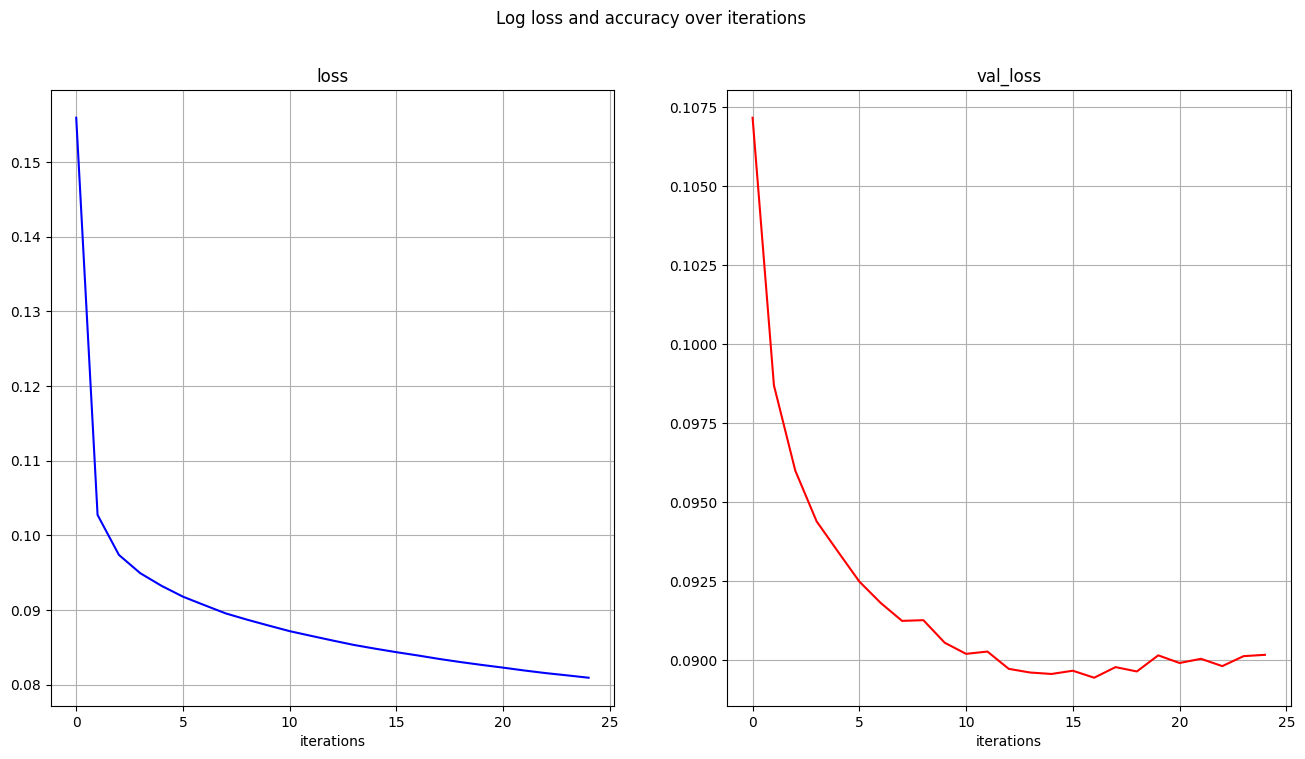

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train_noisy, # noisy input
                          x_train,       # clean target
                          epochs = 25,
                          batch_size = 256,
                          shuffle = True,
                          validation_data = (x_test_noisy, x_test))
graph_history(history, title='Log loss and accuracy over iterations')
xhat = autoencoder.predict(x_test)

Now we plot the images, and we can see that most of the noises are gone:


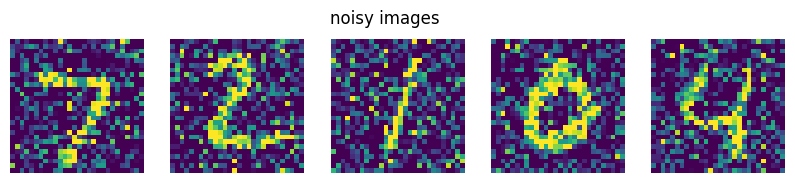

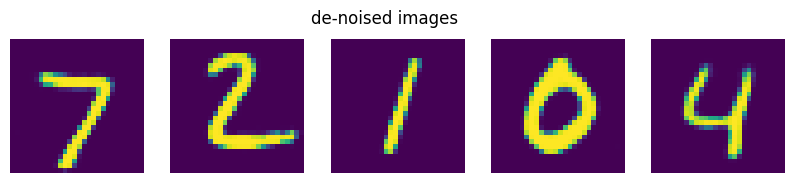

In [ ]:
fig1 = plt.figure(figsize=(10,2))
fig1.suptitle("noisy images")
fig2 = plt.figure(figsize=(10,2))
fig2.suptitle("de-noised images")

for i, img_index in enumerate(range(5)):
    ax1 = fig1.add_subplot(1, 5, i+1)
    ax1.imshow(x_test_noisy[img_index].reshape((28,28)))
    ax1.axis("off")

    ax2 = fig2.add_subplot(1, 5, i+1)
    ax2.imshow(xhat[img_index].reshape((28,28)))
    ax2.axis("off")

### Exercise 1
In this exercise, you will use the encoder part of an Autoencoder for low-dimensional data visualization.

- Create an autocoder using the class `Autoencoder`, with latent dimension of 3;
- Fit the autoencoder model using the training set `x_train` and validate using the test set `x_test`;
- Apply the `.encoder` method of the autoencoder on the test set `x_test`;
- Display the output using the **plot_code** helper function.


In [ ]:
autoencoder = Autoencoder(latent_dim = 3)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                shuffle = True,
                epochs = 50,
                batch_size = 256,
                validation_data=(x_test, x_test))
h =  autoencoder.encoder(x_test)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4904 - val_loss: 0.2759
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2719 - val_loss: 0.2543
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2500 - val_loss: 0.2363
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2362 - val_loss: 0.2311
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2313 - val_loss: 0.2285
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2292 - val_loss: 0.2268
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2274 - val_loss: 0.2254
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2258 - val_loss: 0.2244
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2252 - val_loss: 0.2233
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2239 - val_loss: 0.2225
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2236 - val_loss: 0.2219
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11

<details>
    <summary>Click here for Solution</summary>

```python
autoencoder = Autoencoder(3)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history=autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
h=autoencoder.encoder(x_test)
```

</details>


In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

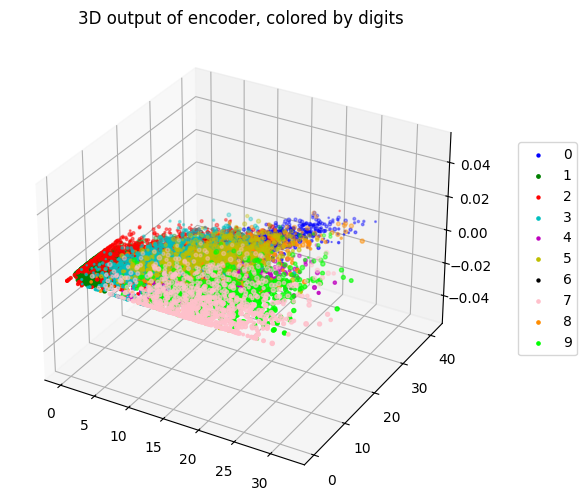

In [ ]:
plot_code(h.numpy(), y_test)

### Exercise 2


In this exercise, you will work with a different dataset, which is the fashion MNIST dataset downloaded from Keras. You will use an autoencoder to try to reconstruct the images and analyze the results.


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test  / 255.0
print(x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


Let's flatten the training and validation data and pass it to the Autoencoder:


In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
x_temp = Flatten()(x_train)
x_test_temp = Flatten()(x_test)
x_temp.shape, x_test_temp.shape

(TensorShape([60000, 784]), TensorShape([10000, 784]))

In [ ]:
encoding_dim = 3
autoencoder = Autoencoder(encoding_dim)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_temp, x_temp,
                          epochs = 25,
                          batch_size = 256,
                          shuffle = True,
                          validation_data = (x_test_temp, x_test_temp))

NameError: name 'Autoencoder' is not defined

Looking at the output, we see the autoencoder can't reconstruct the data very well as it's too complex; Therefore, we need a better approach to represent more complex data.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


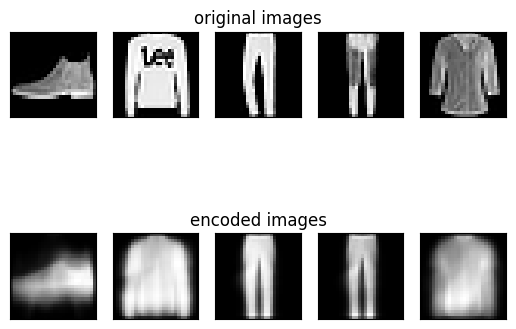

In [ ]:
xhat = autoencoder.predict(x_test_temp)
plot_images(x_test, xhat, start=0, stop=5)

## Deep Autoencoders


Like deep neural networks, adding more layers to the encoder and decoder will grant your autoencoders more representational power, allowing you to solve increasingly complex problems. For example, the reconstructed images of the fashion MNIST dataset plotted above did not retain enough features of the original images, so people will instantly recognize a shoe by looking at the first reconstructed image. Analogous to the fact that deep neural networks can learn and extract more complex features from the data than shallow neural networks, a deep autoencoder will also be able to do a better job in tasks that involve complex data than shallow autoencoders.

Let's create a deep autoencoder class, analogous to creating a deep neural network:


In [ ]:
class Deep_Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim1, latent_dim2):
        super(Deep_Autoencoder, self).__init__()
        self.latent_dim1 = latent_dim1
        self.latent_dim2 = latent_dim2

        # Encoder layer
        self.encoder = Sequential([Flatten(),
                                   Dense(latent_dim1, activation='relu'),
                                   Dense(latent_dim2, activation='relu')])

        # Decoder layer
        self.decoder = Sequential([Dense(latent_dim1, activation='relu'),
                                   Dense(784, activation='sigmoid'),
                                   Reshape((28, 28))])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

We have the encoder:

```encoder = Sequential([layers.Flatten(),Dense(latent_dim_1, activation='relu'),Dense(latent_dim_2, activation='relu')])```

We add a flattening layer for convenience as we will input rectangular image tensors. The encoder consists of two linear layers with Relu activations. Each layer, in this case, gets consistently smaller.

We have the decoder:

```decoder = tf.keras.Sequential([ Dense(latent_dim_1, activation='relu'),Dense(784, activation='sigmoid'),Reshape((28, 28))])```

which consists of two linear layers. The first layer has a Relu activation; the second layer has a sigmoid activation. For convenience, we add a layer to reshape the output to a rectangular image.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/deep_ae.png" width="70%" style="vertical-align:middle;margin:15px 0px"></center>

By doing so, we create a deep autoencoder object; We set the output shape of each layer smaller and smaller until the latent dimension reaches three. Let's train the model.


In [ ]:
latent_dim1 = 128
latent_dim2 = 3

d_autoencoder = Deep_Autoencoder(latent_dim1, latent_dim2)
d_autoencoder.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy')
history = d_autoencoder.fit(x_train, x_train,
                            epochs = 50,
                            batch_size = 256,
                            shuffle = True,
                            validation_data = (x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.4772 - val_loss: 0.3501
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3428 - val_loss: 0.3343
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.3306 - val_loss: 0.3292
Epoch 4/50
 96/235 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3268

KeyboardInterrupt: 

We plot the output; we can see the reconstructed images look similar to the original images; this is even after the dimension has been reduced to three in the bottleneck.


In [ ]:
xhat = d_autoencoder.predict(x_test)
plot_images(x_test, xhat, start=0, stop=5)

### Loading Images From a Directory for Autoencoders


Loading images from a directory for Autoencoders is similar to that for neural networks, but there are also several small differences. Like neural networks we create an object using ```image_dataset_from_directory``` that consists of human faces.


In [45]:
dataset_url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/face_data.zip"
await skillsnetwork.prepare(dataset_url, overwrite=True)

  0%|          | 0/47424 [00:00<?, ?it/s]

Saved to '.'


In [46]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [47]:
img_height = 50
img_width = 50
batch_size = 100
data_dir_face = os.path.join(os.getcwd(), 'face_data')

In [48]:
xface = image_dataset_from_directory(
            directory = data_dir_face,
            validation_split = 0.2,
            subset = 'training',
            seed = 123,
            image_size = (img_height, img_width),
            batch_size = batch_size,
            color_mode = 'grayscale')

Found 23708 files belonging to 1 classes.
Using 18967 files for training.


We will copy the object as we will use it multiple times


In [49]:
x_face_copy = copy.copy(xface)

Unlike neural networks, autoencoders have no labels. Instead, the input and output are both a set of features $\textbf{X}$. Therefore you have to map the output from the directory object from $(\textbf{x},\textbf{y})$ to $(\textbf{x},\textbf{x}$), using the following function:


In [50]:
def change_inputs(images, labels):
    # print(images.shape, labels.shape)
    return images, images

To apply the transform to the image, we use the ```apply``` method to apply the function ```change_inputs``` :


In [51]:
xface

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

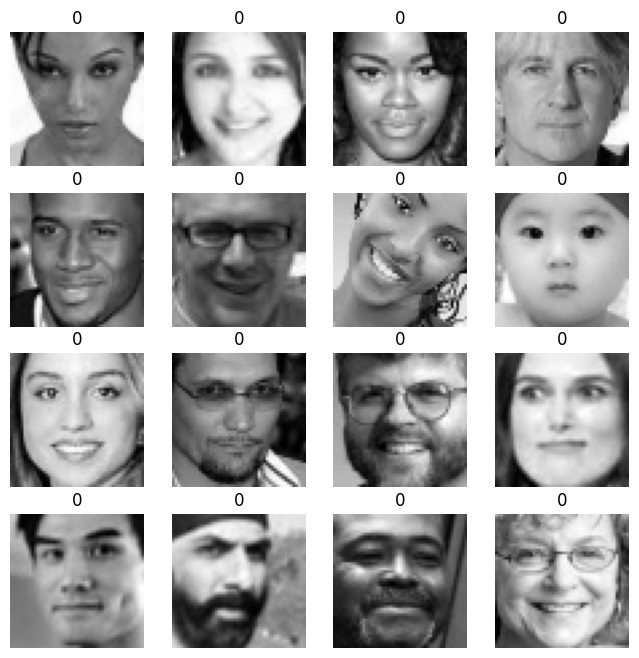

In [52]:
for images, labels in xface.take(1):
    plt.figure(figsize=(8,8))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray') # remove channel dimension
        plt.title(str(labels[i].numpy()))
        plt.axis('off')

plt.show()

In [53]:
x_face_1 = xface.map(change_inputs)
x_face_1

<_MapDataset element_spec=(TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32, name=None))>

We will convert the object to an iterator so we can cycle through the samples:


In [54]:
# iterator object
x_iter = iter(x_face_1)

We see each output is two tuples, each an array of 100 50x50 images


In [55]:
# Retrieve one batch from the dataset, which includes 100 images
image1, image2 = next(x_iter)

In [56]:
print("images1 shape {}, and images2 {}".format(image1.shape, image2.shape))

images1 shape (100, 50, 50, 1), and images2 (100, 50, 50, 1)


We can plot some of the images using the function ```display_auto``` where ```n``` is the sample in a batch and ```B``` is the batch number, assuming next has only been called once


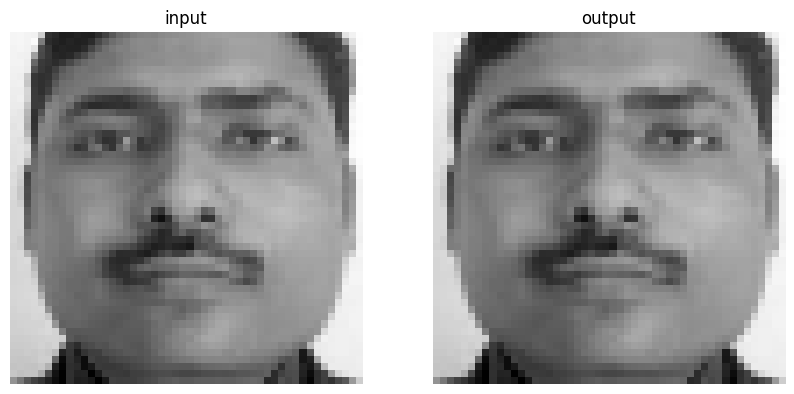

In [57]:
display_auto(x_iter,n=1,B=1)

we can also apply other transformations like normalizing the image


In [58]:
normalization_layer = tf.keras.layers.Rescaling(1.0/255)

In many cases we would like a corrupted version of the image $\textbf{x},\tilde{\textbf{x}}$. Let's construct a from-the-directory object that can be used to train an autoencoder to deblur an image. In many applications like noise removal, you add noise to $\textbf{x}$ and get $\tilde{\textbf{x}}$. In this case, the input  $\tilde{\textbf{x}}$ will be a blurred image.


In [59]:
a = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])
print("Shape of 'a':", a.shape)
(a.reshape(3, 3, 1, 1)/9)

Shape of 'a': (3, 3)


array([[[[0.11111111]],

        [[0.11111111]],

        [[0.11111111]]],


       [[[0.11111111]],

        [[0.11111111]],

        [[0.11111111]]],


       [[[0.11111111]],

        [[0.11111111]],

        [[0.11111111]]]])

In [76]:
def avg(shape, dtype=None):
    """
    Create the kernel performing:
    - weighted averages of 9 surrounding pixels
    - soften edges
    - reduce noise
    - produce classic blur effect
    """

    # Created 3x3 kernel filter (mean filter)
    grad = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]]).reshape((3, 3, 1, 1)) / 9
                     # 9 comes from total numbers in kernel filter (3x3)

    # 'assert' -> debugging tool
    # If the condition is true, nothing happens. Unless, stop the program and raise "AssertionError"
    assert grad.shape == shape

    # Return as tensorflow variable ->> not to be constant and trainable
    return tf.keras.backend.variable(grad, dtype='float32')

a_conv = Conv2D(input_shape = (50, 50, 1),
                filters = 1,                # 1 output filter
                kernel_size = 3,            # 3x3 kernel
                kernel_initializer = avg,
                strides = 1,                # move 1 pixel at a time
                padding = 'same')           # output size = input size

                # input_shape = (None, 50, 50, 1),

In [77]:
@tf.function
# Compute using computation graph (faster by mapping)
def blur_image(images, labels):
    x = normalization_layer(images) # convert image range 0 -> 1
    x_b = a_conv(x) # call like a function
    return x_b, x

We normalize the image and then blur the image using a filter, we apply the function to the dataset object.


In [78]:
xface_ = xface.map(blur_image)

In [74]:
xface_

<_MapDataset element_spec=(TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32, name=None))>

We see the input image is blurred:


In [79]:
xiter = iter(xface_)
xiter

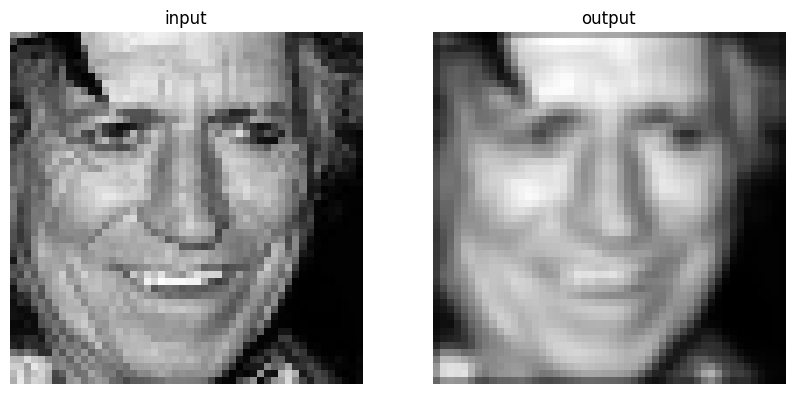

In [80]:
display_auto(xiter, n=1, B=1)

## Convolutional Autoencoders


Analogous to Convolutional neural networks, there are Convolutional Autoencoders (CAEs). Compared to the Autoencoders with fully connected layers, Convolutional Autoencoders with Conv2D layers do a better job encapsulating the pixel data's underlying patterns.

The following is an illustration of the CAE's architecture:

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/CAE.png" width="80%" style="vertical-align:middle;margin:15px 0px"></center>

Image from [this article](https://ai.plainenglish.io/convolutional-autoencoders-cae-with-tensorflow-97e8d8859cbe?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01).

We can build a convolutional autoencoder class:


In [82]:
class CNN_Autoencoder(Model):
    def __init__(self):
        super(CNN_Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            Input(shape=(50, 50, 1)),
            Conv2D(16, (3,3), activation='relu', padding='same', strides=1),
            Conv2D(8, (3,3), activation='relu', padding='same', strides=1)
        ])

        self.decoder = tf.keras.Sequential([
            Conv2DTranspose( 8, kernel_size=3, strides=1, activation='relu', padding='same'),
            Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
            Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
        ])

        # Conv2DTranspose() -> increase spatial size, reconstruct original image dim
        # Conv2D() -> extract features, detect edges and reduce spatial size
    def call(self, x):
        encoded = self.encoder(x)
        # Pass the encoded features into decoder network
        decoded = self.decoder(encoded)

        return decoded

In [39]:
class CNN_Autoencoder(Model):
    def __init__(self):
        super(CNN_Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            Input(shape=(50, 50, 1)),
            Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
            Conv2D(8, (3, 3), activation='relu', padding='same', strides=1)])

        self.decoder = tf.keras.Sequential([
            Conv2DTranspose(8, kernel_size=3, strides=1, activation='relu', padding='same'),
            Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
            Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



The encoder consists of several convolution layers that will produce an activation map:

```encoder = tf.keras.Sequential([layers.Input(shape=(50, 50, 1)),Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),Conv2D(8, (3, 3), activation='relu', padding='same', strides=1)])```


The decoder consists of several transposed convolutional or de-convolutional layers; the final layer is a convolutional layer that combines the activation maps of the previous transposed convolutional layer to form an image:

```decoder = tf.keras.Sequential([Conv2DTranspose(8, kernel_size=3, strides=1, activation='relu', padding='same'),Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])```


Let's create a ```CNN_Autoencoder``` object


In [83]:
cnn_autoencoder_face = CNN_Autoencoder()

Let's train the CNN autoencoder and use it to de-blur an image by minimizing the difference between $\tilde{\textbf{x}}$ and $\textbf{x}$. Note that for training, we pass in `Xface`, which can be seen as an image data generator that will feed our model pairs of blurred images and original image. We expect the model to learn and minimize the difference between the two and eventually be able to recover the original image from a blurred image.


Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 154s 798ms/step - loss: 0.0235
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 147s 774ms/step - loss: 0.0026
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 199s 759ms/step - loss: 0.0018
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 148s 778ms/step - loss: 0.0015
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 148s 778ms/step - loss: 0.0014
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 146s 767ms/step - loss: 0.0013
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 203s 776ms/step - loss: 0.0011
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 196s 743ms/step - loss: 0.0011
Epoch 9/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 141s 739ms/step - loss: 0.0010
Epoch 10/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 141s 741ms/step - loss: 9.9530e-04


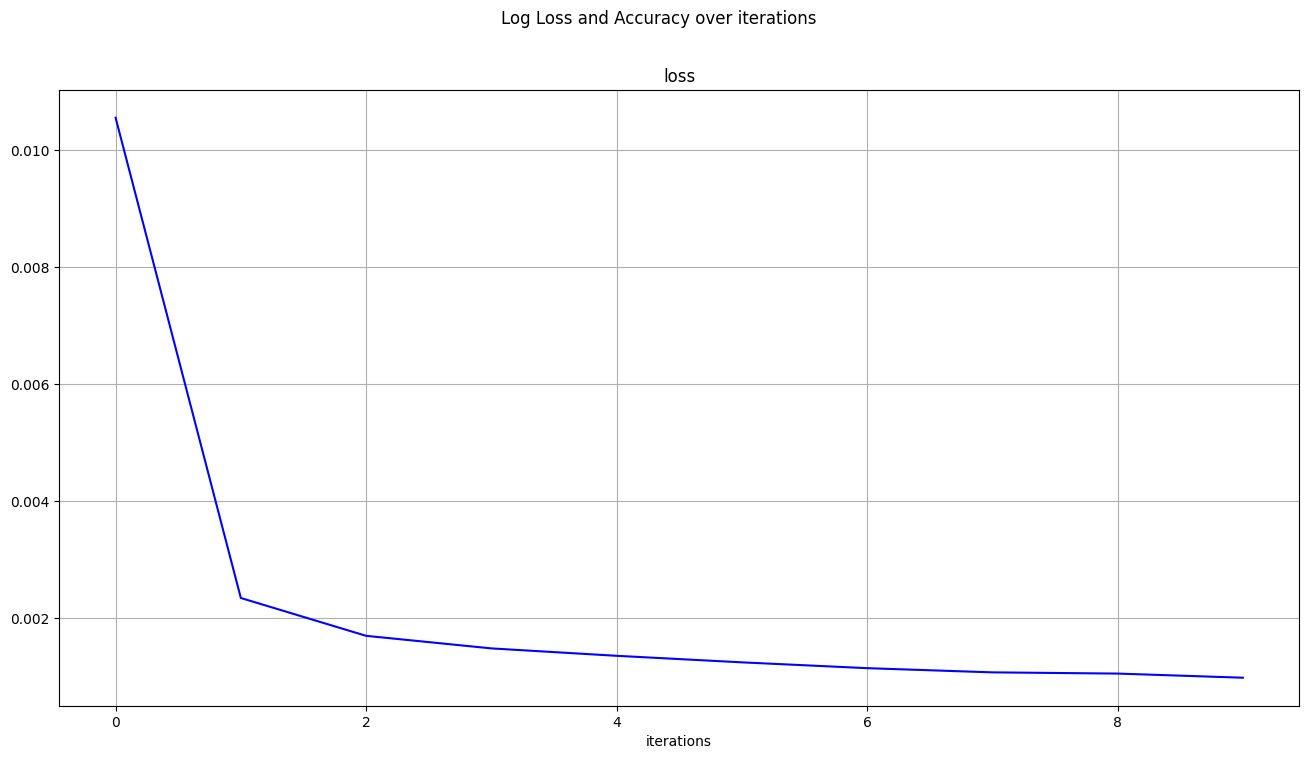

In [84]:
cnn_autoencoder_face.compile(optimizer='adam', loss='mse')
history = cnn_autoencoder_face.fit(xface_, epochs=10)
graph_history(history, title='Log Loss and Accuracy over iterations')

In [85]:
# Save model file
cnn_autoencoder_face.save("cnn_autoencoder_face.keras")

# Save history file as json
import json
with open("history_autoencoder_face.json", "w") as f:
    json.dump(history.history, f)

from google.colab import files

# Download model
files.download("cnn_autoencoder_face.keras")

# Download history file
files.download("history_autoencoder_face.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We take some samples from the set of blurred images and use the trained autoencoder to deblur the images and compare them to the blurred images.


In [86]:
x = next(xiter)
xhat = cnn_autoencoder_face.predict(x[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


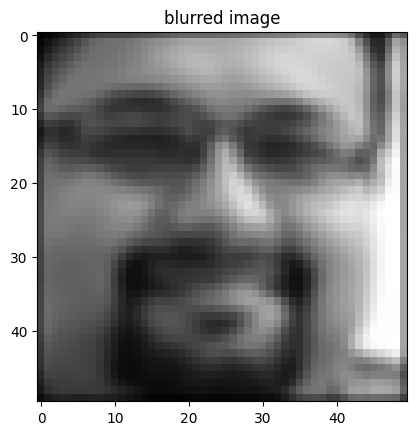

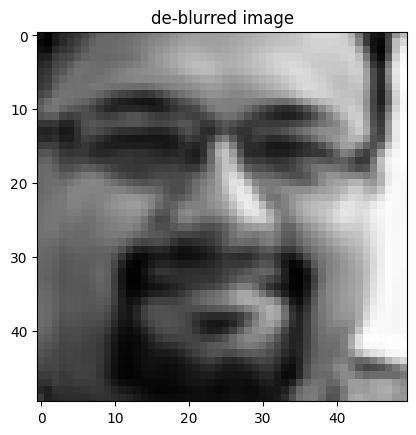

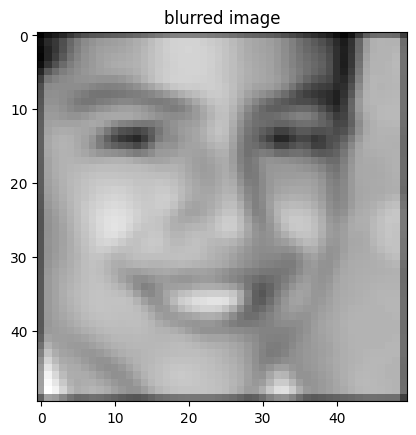

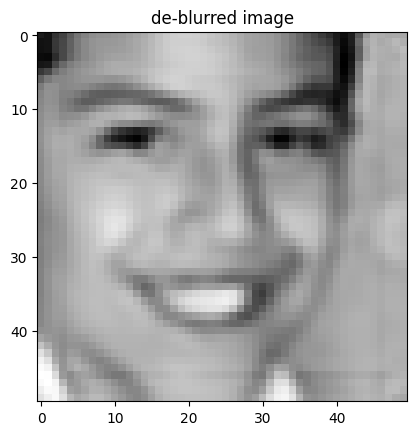

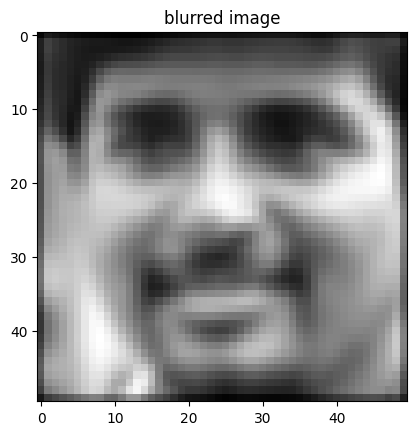

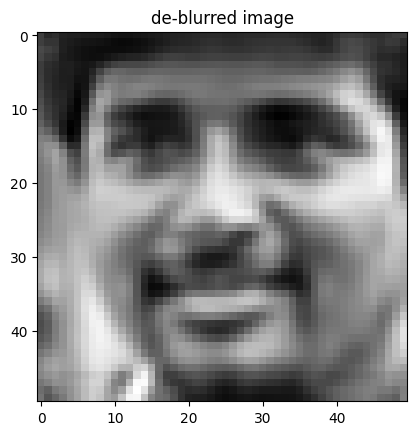

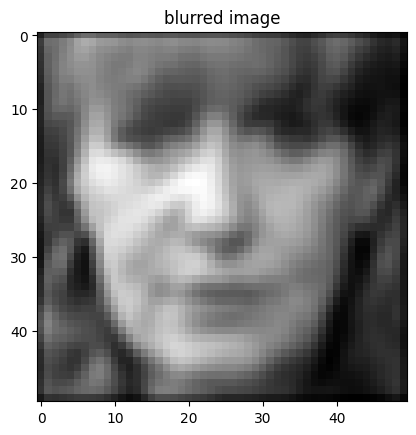

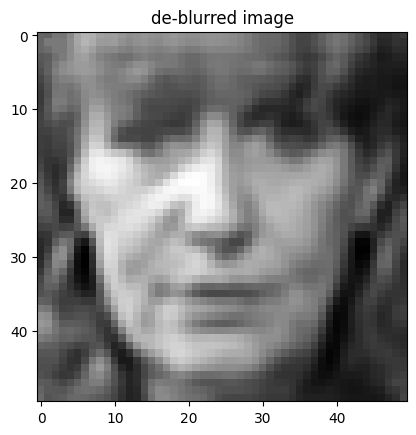

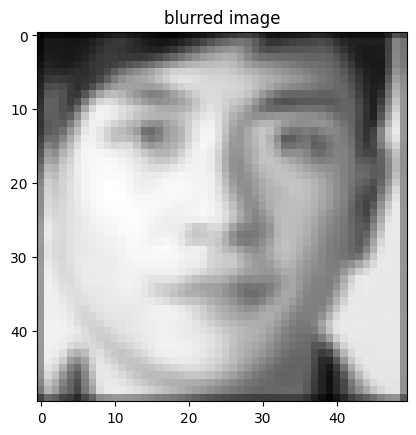

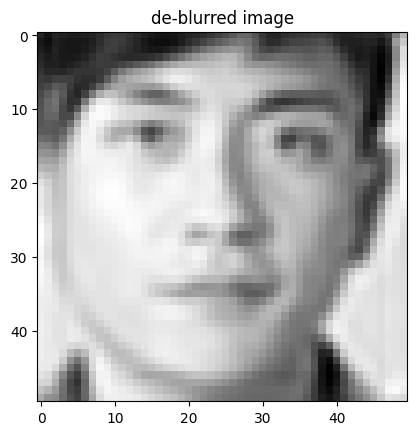

In [87]:
for image_b, image_db in zip(x[0].numpy()[0:5,:,:,0],xhat[0:5,:,:,0]):
    plt.imshow(image_b, cmap="gray")
    plt.title("blurred image")
    plt.show()
    plt.imshow(image_db, cmap="gray")
    plt.title("de-blurred image")
    plt.show()

We see that as the CNN autoencoder can learn the complex image features well, it can be used to de-blur the blurred images and represent the features more clearly.


## Congratulations! You've completed the exercises.


## Author


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2022-03-28        | 0.1     | David Pasternak      | Created Lab    |
| 2022-05-10        | 0.2     | Sam Prokopchuk      | Complete Draft of Lab    |
| 2022-08-05        | 0.3     | Roxanne Li      | Review and edit Lab    |
| 2022-09-09        | 0.3     | Steve Hord      | QA pass edits          |

## <h3 align="center"> © IBM Corporation 2022. All rights reserved. <h3/>
